In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

        
A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
        
    One major issue, after exploring the data, is the appearances of outliers. One store (shop_id=78) sold each sneaker for $25725.00. Another store (shop_id=42) had 17 different orders, by the same user (user_id=607), purchasing 2000 items/sneakers totaling $704,000 (the largest order amount in all the transactions) each transaction.Both very odd behavior. With the calculated AOV of $3145.13 the outliers severely skewed the average. Averages are highly affected by outliers (both large and small). Safest bet would be to work within the range between the 2nd quartile ($163.00 or more) and 3rd quartile ($390.00 or less).  Outliers will need to be removed or dealt with to correct this issue



    𝑂𝑝𝑡𝑖𝑜𝑛 1: Manual removal of outliers altogether Although a viable option, without knowing the full scope of the data or the problem, the removal of outliers, can lead to future problems and/or a large portion of your data being removed.
Mean - Outliers Omitted = $297.87

    𝑂𝑝𝑡𝑖𝑜𝑛 2: Trimmed/Truncated Mean (non-permanent removal of some outliers based on a set percentage then calculate the remaining value’s average), Working within 95% of the data (removing top and bottom 2.5%  of the data) and calculating the remaining averaging.
Truncated Mean = $300.23

    𝑂𝑝𝑡𝑖𝑜𝑛 3: Use a different metric to summarize the data’s central tendencies, by far the easiest solution.. 
    Median = the "middle" most value   Median = $284.00
Mode = the most frequently reoccurring value    Mode = $153.00

    𝑂𝑝𝑡𝑖𝑜𝑛 4: Weighted Average, assigning weights to each order_amount value based on the scaled values of the order_amount column. The larger the order_amount the more it is penalized.
Weighted Average = $285.80

    Option 5:  Grouped by Store Adjusted Average We can bin/group the transactions together based shop_id and calculate the averages of each group independently from each other. After we can remove the problem stores from these averages (shop_id=42 & shop_id=78) then get the collected average of the remaining stores.
Grouped by Store Adjusted Average = $299.68





    B. What metric would you report for this dataset?

I would use Median instead of Average. The sweet spot with numerical data is in between the 2nd and the 3rd quartiles. And right smack in the middle (at 50%) is the Median, the "middle" most value.

Mode (Frequency or most occurring value) is another viable option, but the mode=153 (with 87 occurences) is lower then the 25th percentile.

    C. What is its value?

df[['order_amount']].median() = 284.00

In [3]:
# Load data into pandas DataFrame
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
# Break down of the dataframe and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [7]:
#Break down of the dataframe with basic statistical data
df.describe(include='all')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,3,4991
top,NaN,NaN,NaN,NaN,NaN,credit_card,2017-03-28 4:00:00
freq,NaN,NaN,NaN,NaN,NaN,1735,3
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,NaN,NaN
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,NaN,NaN
min,1.000000,1.000000,607.000000,90.000000,1.00000,NaN,NaN
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,NaN,NaN
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,NaN,NaN
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,NaN,NaN


In [76]:
print(f"Total number of orders place at sneakers shops: {df['order_id'].nunique()}")
print(f"Total number of unique sneakers shops: {df['shop_id'].nunique()}")
print(f"Total number of unique customers: {df['user_id'].nunique()}")
print(f"Average order value (AOV) of all the sneaker shops: ${round(df['order_amount'].mean(), 2)}")
print(f"Average items per Transaction: {round(df['total_items'].mean(), 2)}")
print(f"Most frequent payment method for transaction: {df['payment_method'].mode().values}")
print(f"Most frequent purchaser's User_ID: {df['user_id'].mode().values} appears in transactions {df[['user_id']].value_counts(ascending=False).head(1).values} times")
print(f"Most active Store_ID based on transaction: Shop_ID {df['shop_id'].mode().values} appears {df[['shop_id']].value_counts(ascending=False).head(1).values} times")

Total number of orders place at sneakers shops: 5000
Total number of unique sneakers shops: 100
Total number of unique customers: 301
Average order value (AOV) of all the sneaker shops: $3145.13
Average items per Transaction: 8.79
Most frequent payment method for transaction: ['credit_card']
Most frequent purchaser's User_ID: [718] appearing in transactions [28] times
Most active Store_ID based on transaction: Shop_ID is [53] appearing [68] times


In [10]:
# Break down of the average order value per store
aov_per_store = df[['order_amount']].groupby(df['shop_id']).mean()
display(aov_per_store)

,order_amount
shop_id,
1,308.818182
2,174.327273
3,305.250000
4,258.509804
5,290.311111
...,...
96,330.000000
97,324.000000
98,245.362069


<AxesSubplot:>

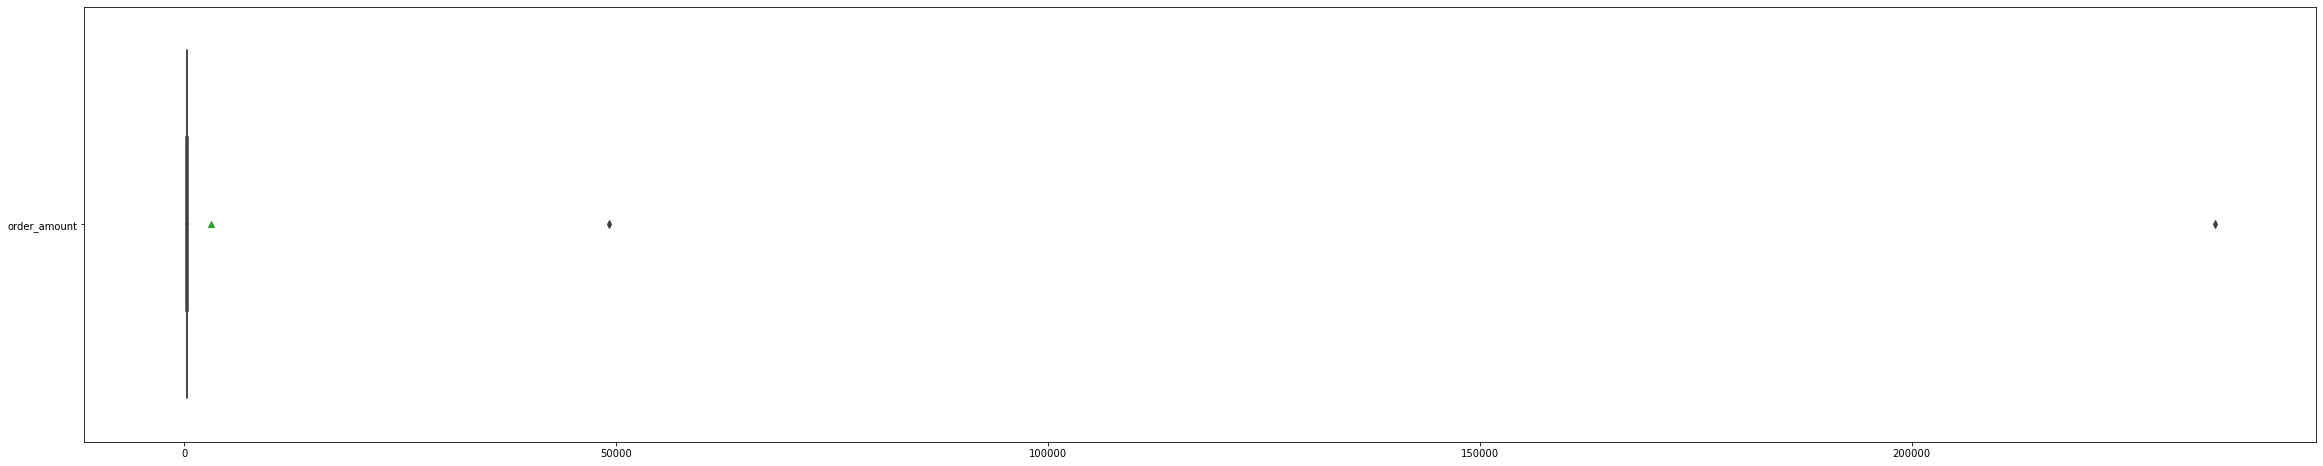

In [26]:
# Plotting the Average order value per store to locate the stores that are outliers
fig, ax = plt.subplots(figsize=(40,8))
sns.boxplot(data=aov_per_store,orient="h",showmeans=True)  


<AxesSubplot:xlabel='total_items', ylabel='count'>

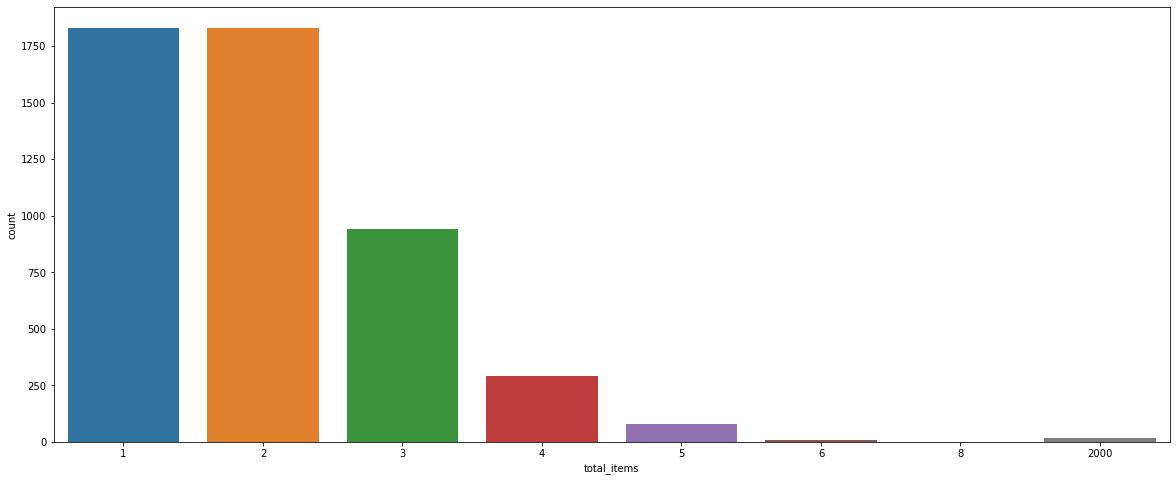

In [80]:
# Plotting the count of total items sold per transaction
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='total_items', data=df)

In [8]:
# Quantile-based spliting of the underlying data into equal sized bins (4 quantiles)
pd.qcut(df['order_amount'], q=4)

0        (163.0, 284.0]
1       (89.999, 163.0]
2       (89.999, 163.0]
3       (89.999, 163.0]
4       (89.999, 163.0]
             ...       
4995     (284.0, 390.0]
4996     (163.0, 284.0]
4997     (284.0, 390.0]
4998     (284.0, 390.0]
4999     (284.0, 390.0]
Name: order_amount, Length: 5000, dtype: category
Categories (4, interval[float64, right]): [(89.999, 163.0] < (163.0, 284.0] < (284.0, 390.0] < (390.0, 704000.0]]

In [9]:
# Correlation matrix (to show possible relationships)
df_predictors = df.iloc[:,1:-1]
corr= df_predictors.corr()
corr

,shop_id,user_id,order_amount,total_items
shop_id,1.000000,0.009033,-0.005559,-0.016304
user_id,0.009033,1.000000,-0.158104,-0.161247
order_amount,-0.005559,-0.158104,1.000000,0.991747
total_items,-0.016304,-0.161247,0.991747,1.000000


<AxesSubplot:>

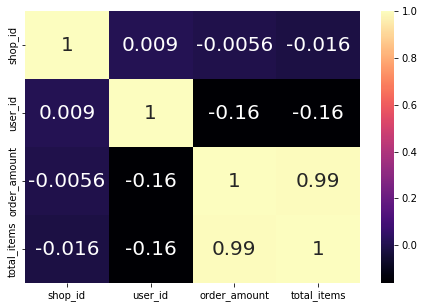

In [83]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(7.5,5))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='magma')


As show in this correlation matrix, order amount and total items are posivitely (99%) correlated, as one increases the other increases as well.

98% of the order amount is below $800.08


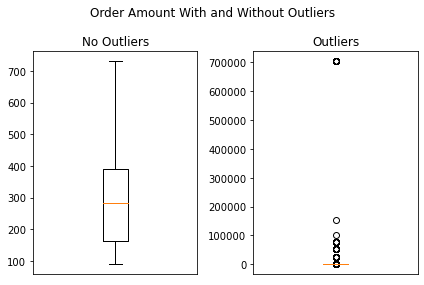

In [30]:

print(f"98% of the order amount is below ${round(df['order_amount'].quantile(.98), 2)}")
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df['order_amount'], showfliers=False)
ax[0].set_title("No Outliers")
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(df['order_amount'], showfliers=True)
ax[1].set_title("Outliers")
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount With and Without Outliers')
fig.tight_layout()
plt.show()

In [191]:
# Create a price per item for every transaction

df['price_per_item'] = df['order_amount']/df['total_items']
display(df[['price_per_item']].describe(include='all'))
price_per_item = pd.DataFrame(df[['price_per_item']].value_counts(), columns = ['count']).sort_values(by='price_per_item').reset_index()
display(price_per_item)

,price_per_item
count,5000.000000
mean,387.742800
std,2441.963725
min,90.000000
25%,133.000000
50%,153.000000
75%,169.000000
max,25725.000000


,price_per_item,count
0,90.0,42
1,94.0,55
2,101.0,42
3,111.0,40
4,112.0,124
5,114.0,59
6,116.0,58
7,117.0,77
8,118.0,118
9,122.0,50


In [182]:
price_per_item.describe(include='all')

,price_per_item,count
count,58.000000,58.000000
mean,594.465517,86.206897
std,3357.902563,50.290649
min,90.000000,35.000000
25%,131.250000,49.250000
50%,153.500000,59.000000
75%,171.750000,108.000000
max,25725.000000,256.000000


df

In [195]:
# Filtering the price per item with a tresheld of $500 per sneakers or more
df.query('price_per_item >= (500)')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_scaled,total_items_scaled,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,0.036418,0.000000,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,0.072964,0.000500,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,0.072964,0.000500,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,0.072964,0.000500,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,0.072964,0.000500,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,0.219147,0.002501,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,0.036418,0.000000,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,0.036418,0.000000,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,0.036418,0.000000,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,0.109510,0.001001,25725.0


We can see the only store selling sneakers at more than $500.00 per item is Shop_id=78. In actuality Shop_id=78 sold each sneaker at $25725.00 each. Very unnatural.

# A) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

## 𝑂𝑝𝑡𝑖𝑜𝑛 1: Manual removal of outliers

In [102]:
# Find all orders with order amounts greater then 804 and total items are more then 5
df[(df['order_amount'] > 804) & (df['total_items']>5)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1563,1564,91,934,960,6,debit,2017-03-23 8:25:49
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00


In [103]:
# Find all orders with order amounts greater then 804 and total items are less then 5
df[(df['order_amount'] > 804) & (df['total_items']<5)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
742,743,12,727,804,4,cash,2017-03-14 16:38:01
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21


In [130]:
df_filtered = df[df['order_amount'] < 805]
df_filtered.describe()

,order_id,shop_id,user_id,order_amount,total_items,order_amount_scaled,total_items_scaled
count,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000
mean,2498.991840,49.853121,849.863525,297.873725,1.973276,0.000295,0.000487
std,1445.246051,29.089209,86.896057,150.471796,0.949822,0.000214,0.000475
min,1.000000,1.000000,700.000000,90.000000,1.000000,0.000000,0.000000
25%,1245.250000,24.000000,776.000000,163.000000,1.000000,0.000104,0.000000
50%,2497.500000,50.000000,850.000000,284.000000,2.000000,0.000276,0.000500
75%,3752.750000,74.000000,925.000000,386.000000,3.000000,0.000421,0.001001
max,5000.000000,100.000000,999.000000,804.000000,6.000000,0.001014,0.002501


<AxesSubplot:xlabel='order_amount', ylabel='Count'>

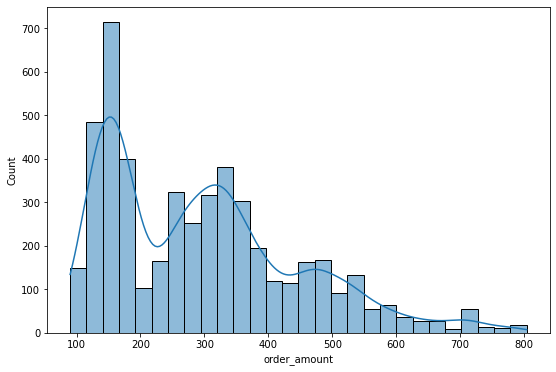

In [143]:
plt.figure(figsize=(9,6))
sns.histplot(x='order_amount', data=df_filtered, kde=True)

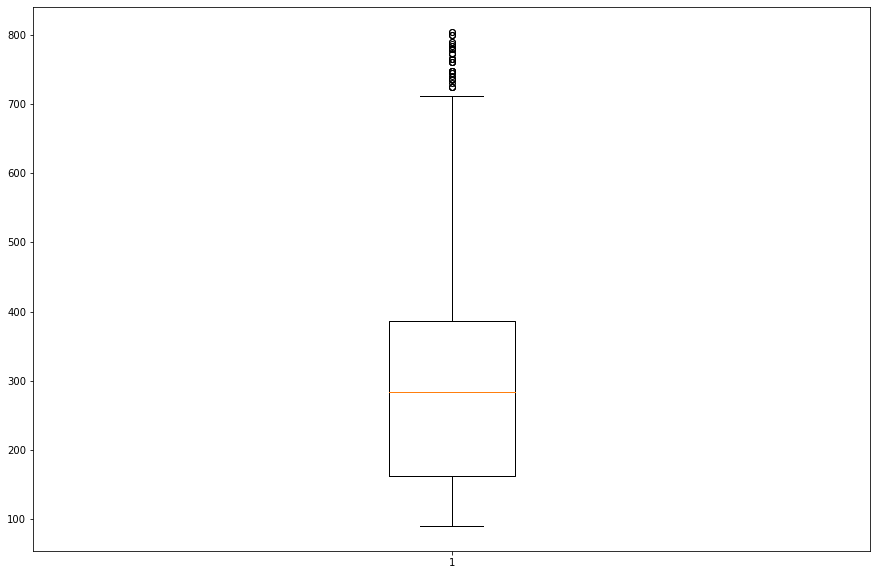

In [196]:
fig = plt.figure(figsize =(15, 10))
plt.boxplot(df_filtered['order_amount'])
plt.show()

In [201]:
outliers_removed_mean = df_filtered['order_amount'].mean()
outliers_removed_mean 

297.8737250101999

## Trimmed Mean

In [108]:
from scipy import stats

# calculate 25% trimmed mean
stats.trim_mean(df['order_amount'], 0.25)   # removing top and bottom 25% of the data (some outliers)

276.5692

In [109]:
# calculate 10% trimmed mean
stats.trim_mean(df['order_amount'], 0.1)   # removing top and bottom 10% of the data (some outliers)

287.39075

In [110]:
# calculate 5% trimmed mean
stats.trim_mean(df['order_amount'], 0.05)   # removing top and bottom 5% of the data (some outliers)

294.3933333333333

In [197]:
# calculate 2.5% trimmed mean
trimmed_mean = stats.trim_mean(df['order_amount'], 0.025)   # removing top and bottom 5% of the data (some outliers)
trimmed_mean

300.23431578947367

## Weighted Mean

In [221]:
# Getting scaled values in order_amount column
from sklearn.preprocessing import minmax_scale

df['order_amount_scaled'] = minmax_scale(df['order_amount'])
df


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_scaled,total_items_scaled,price_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,0.000190,0.000500,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,0.000000,0.000000,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,0.000077,0.000000,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,0.000094,0.000000,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,0.000094,0.000000,156.0
...,...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,0.000341,0.000500,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,0.000205,0.000500,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,0.000371,0.001001,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,0.000375,0.000500,177.0


In [222]:
# Getting scaled values in order_amount column
from sklearn.preprocessing import minmax_scale

df['total_items_scaled'] = minmax_scale(df['total_items'])
df


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_scaled,total_items_scaled,price_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,0.000190,0.000500,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,0.000000,0.000000,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,0.000077,0.000000,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,0.000094,0.000000,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,0.000094,0.000000,156.0
...,...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,0.000341,0.000500,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,0.000205,0.000500,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,0.000371,0.001001,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,0.000375,0.000500,177.0


In [224]:
# Weighted average where the larger the number of total items per transaction results in a lower weight
g = df.groupby('order_amount')
weights = 1-(df['total_items_scaled'])*100
weighted_average = (df.order_amount / (g.order_amount.transform("sum") * weights)).sum()
weighted_average


285.7957679599083

# Mean of the Average Order Value (AOV) grouped by Store (minus 2 outlier stores)

In [25]:
aov_per_store = pd.DataFrame(df.order_amount.groupby(df['shop_id']).mean())
display(aov_per_store)

,order_amount
shop_id,
1,308.818182
2,174.327273
3,305.250000
4,258.509804
5,290.311111
...,...
96,330.000000
97,324.000000
98,245.362069


In [213]:
# Removing stores with an avg of 600 or more (2 stores - shop_id [42,78]) to calulate the mean without outlier stores
aov_per_store_filtered = aov_per_store[aov_per_store['order_amount'] <= 600]
aov_per_store_averaged = float(aov_per_store_filtered.mean())
aov_per_store_averaged 

299.68239912615485

# B) What metric would you report for this dataset?.

I would use $Median$ instead of Average. The sweet spot with numerical data is in between the 2nd and the 3rd quartiles. And right smack in the middle (at 50%) is the Median, the "middle" most value.

Mode (Frequency or most occurring value) is another viable option, but the mode=153 (with 87 occurences) is lower then the 25th percentile.

## Median, Mean, Min, Max

In [24]:
# Find the median, average, minimum, and maximum values of  all order amount
df.order_amount.agg(['median','mean','min','max',])

median       284.000
mean        3145.128
min           90.000
max       704000.000
Name: order_amount, dtype: float64

In [215]:
middle_most_value = float(df[['order_amount']].median())
middle_most_value

284.0

## Mode

In [218]:
# Find most Frequent order amount
most_frequent = float(df[['order_amount']].mode().values)
most_frequent

153.0

In [27]:
# Find most Frequent order amount (top 5 values)
pd.DataFrame(df[['order_amount']].value_counts()).head().rename(columns={0:'Frequency'})

,Frequency
order_amount,
153,87
306,85
354,82
156,75
160,75


In [258]:
# Make dataframe to display all the averages 

averages = pd.DataFrame([outliers_removed_mean,trimmed_mean,middle_most_value,most_frequent,weighted_average,aov_per_store_averaged],['Mean - Outliers Omitted','Trimmed/Truncated Mean','Median','Mode','Weighted Average','Grouped by Store Adjusted Average'], columns=['Calculated Averages'])
averages


,Calculated Averages
Mean - Outliers Omitted,297.873725
Trimmed/Truncated Mean,300.234316
Median,284.000000
Mode,153.000000
Weighted Average,285.795768
Grouped by Store Adjusted Average,299.682399


# C) What is its value?

median = $284.00

In [252]:
middle_most_value

284.0